## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset ( after previewing both files, using outer merge on MouseID )
combined=pd.merge(mouse_metadata,study_results,how = 'outer' , on='Mouse ID')

# Display the data table for preview
combined.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice.--Unique count of mouse ID 
number_of_mice=len(combined["Mouse ID"].unique())
number_of_mice


249

In [110]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  ( keep first, or last, or drop all of them)
duplicated_df = combined[combined. duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
#converting  any mouse ID with duplicate time points into a list  
duplicated_mouseID_list=duplicated_df['Mouse ID'].to_list()

In [111]:
# Optional: Get all the data for the duplicate mouse ID. 

In [112]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df=combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
# initially try above code, but it is incorrect, as it will only remove rows where both mouse id and timepoint were duplicated 
# however we want to remove all rows assosicated with that ID 
# hence using isin function &dropna for any rows in combined df match mouseID list, drop rows  
clean_df=combined[~combined.isin(duplicated_mouseID_list)].dropna()
clean_df.shape

(1880, 8)

In [113]:
# Checking the number of mice in the clean DataFrame.
updated_number_of_mice=len(clean_df["Mouse ID"].unique())
updated_number_of_mice

248

## Summary Statistics

In [105]:
drug_regimen_type=combined['Drug Regimen'].unique()
drug_regimen_type                    

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#combine groupby and agg function , apply multiple functions to group by columns 
#round it to two decimal 
summary_df=round(clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}),2)
summary_df
# This method produces everything in a single groupby function


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [21]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
mice_count_y

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [37]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#mice_count_y=clean_df.groupby('Drug Regimen')['Mouse ID'].count()
#x_axis = np.arange(len(clean_df['Drug Regimen'].unique()))
#plt.bar(x_axis, mice_count_y, color='g', alpha=0.5)
#plt.xticks(x_axis,clean_df['Drug Regimen'].unique(),rotation="vertical")
#format 
#plt.title("Mice count for different treatments")
#plt.xlabel("Treatments (Drug_Regimen)")
#plt.ylabel("Mice count")
#plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

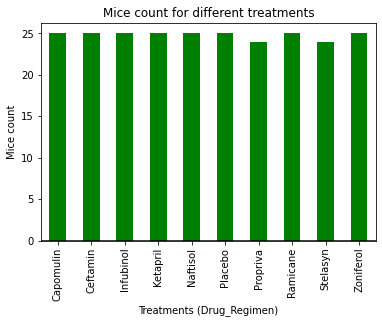

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# it is a bit confusing that the total numner of mice.
# not sure if the same mouse ID  using in the same treatment for multiple times are counted as 1 or multiple
# hence i did both
# same mouse ID counted as 1 
plt.figure()
clean_df.groupby('Drug Regimen')['Mouse ID'].nunique().plot.bar(color=['green'])

#Add horizontal lines at y=0 in data coordinates 
plt.axhline(0, color="k")
#format
plt.title("Mice count for different treatments")
plt.xlabel("Treatments (Drug_Regimen)")
plt.ylabel("Mice count")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

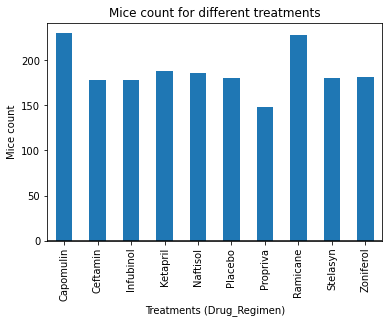

In [36]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# same mouse ID being used multiple times counted as multiple 
plt.figure()
clean_df.groupby('Drug Regimen')['Mouse ID'].count().plot.bar()
#Add horizontal lines at y=0 in data coordinates 
plt.axhline(0, color="k")
#format
plt.title("Mice count for different treatments")
plt.xlabel("Treatments (Drug_Regimen)")
plt.ylabel("Mice count")
plt.show


<AxesSubplot:title={'center':'Distribution of mice gender'}, ylabel='Mouse ID'>

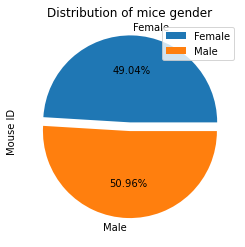

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution=clean_df.groupby(['Sex']).count()
gender_distribution.plot.pie(title="Distribution of mice gender",explode=(0.1,0),autopct='%1.2f%%',y='Mouse ID')


<function matplotlib.pyplot.show(close=None, block=None)>

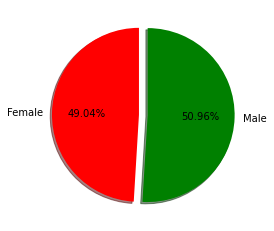

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
#labels = ['Female','Male']

labels=["Female","Male"]
# The values of each section of the pie chart
#duplicated_mouseID_list=duplicated_df['Mouse ID']
gender_count =clean_df.groupby('Sex')['Sex'].count() #returning dataframe 

# The colors of each section of the pie chart
colors = ["red", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
    autopct="%1.2f%%", shadow=True, startangle=90)
plt.show


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
